# Avnish Tripathi
# 22111014

In [19]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

# Question 1

a) I have recorded my voice using an android app in my smartphone. I have recorded the statement "My name is avnish Tripathi".

# b)_Loading audio file using librosa Library

In [20]:
audio = "audio.wav"
ipd.Audio(audio)

In [21]:
x, sr = librosa.load(audio)

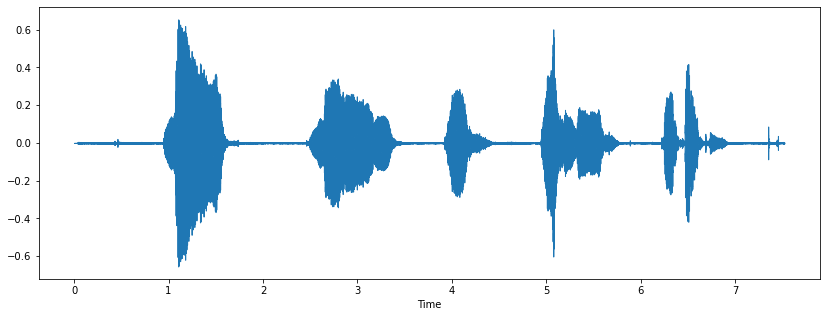

In [22]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [23]:
# Extracting the Short-Time Fourier Transform
FRAME_SIZE = 2048
HOP_SIZE = 512
S_x = librosa.stft(x, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_x.shape

(1025, 324)

In [24]:
# Calculating the spectrogram
Y_scale = np.abs(S_x) ** 2

In [25]:
# Visualizing the spectrogram
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

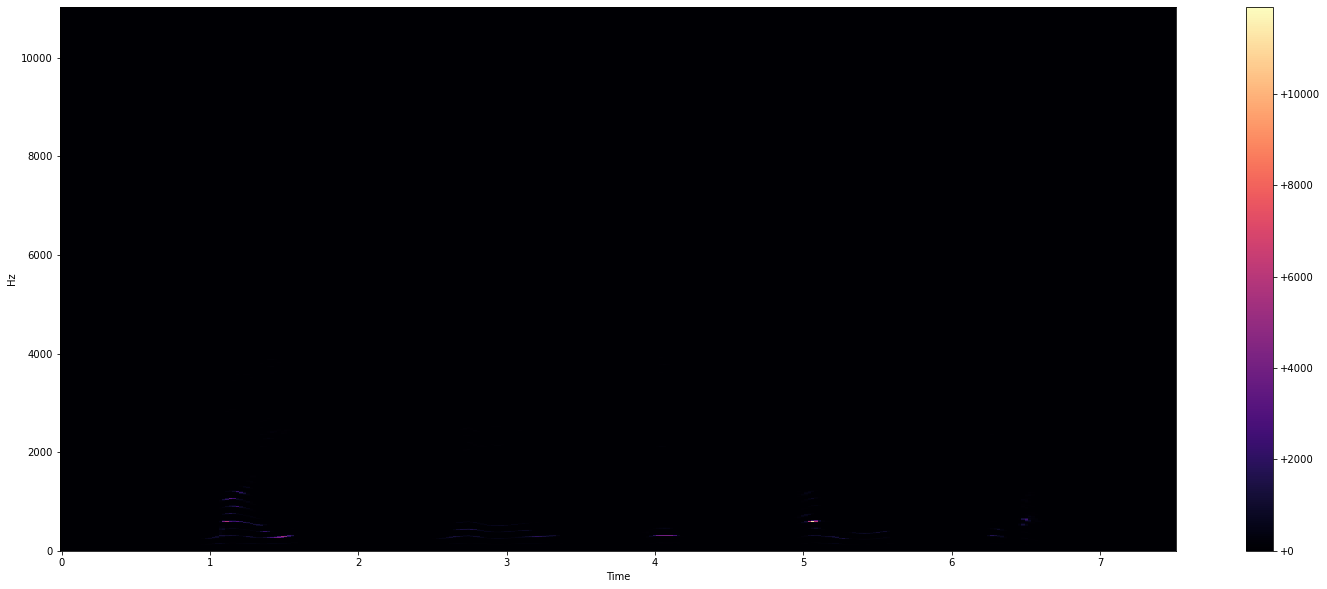

In [26]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

# Log-Amplitude Spectrogram

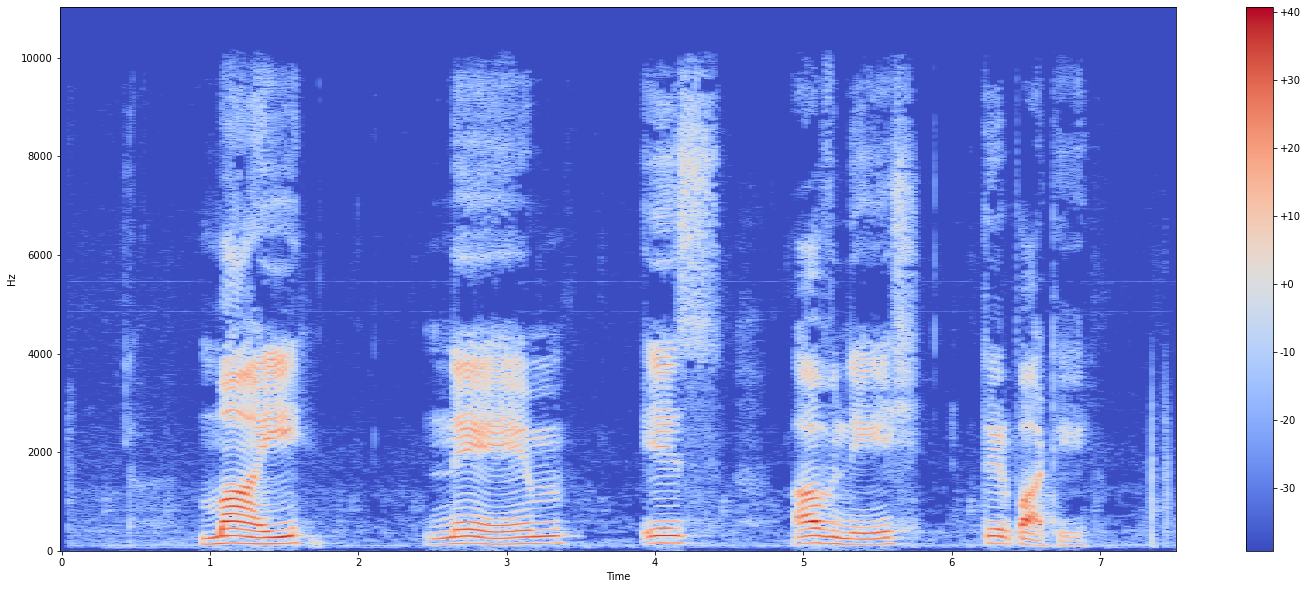

In [27]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

# Log-Frequency Spectrogram

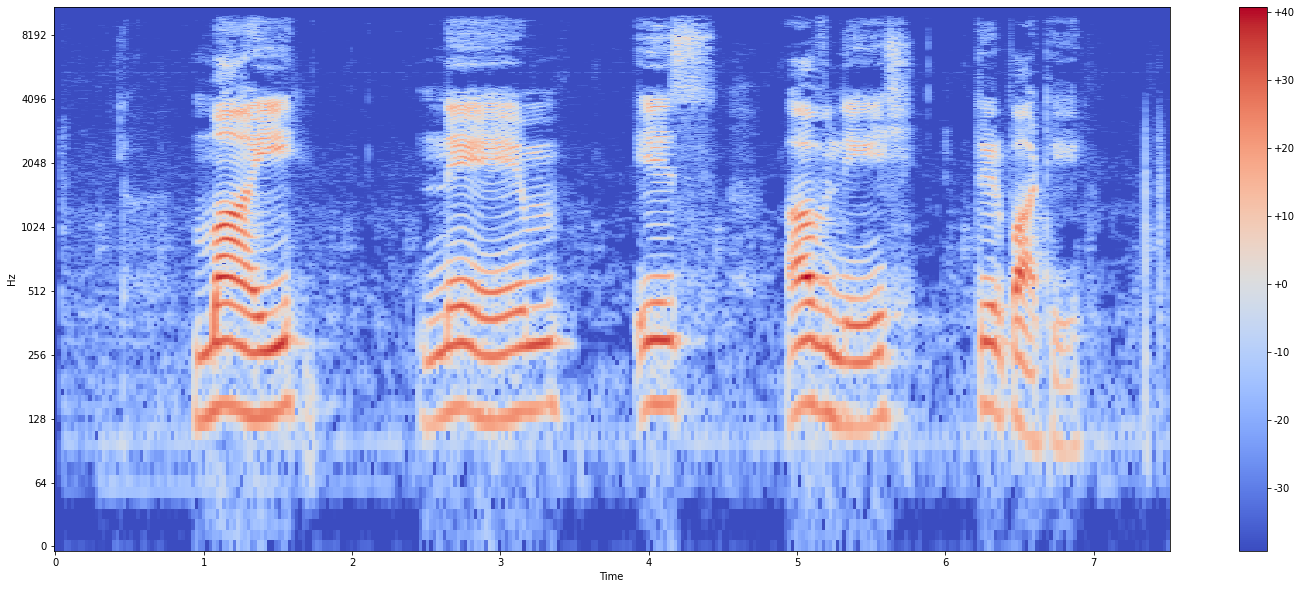

In [28]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

1 c)- Observation- I have observed five spectrums in the spectogram each corresponding to one word in the statement my name is avnish tripathi. I have observed the variation in frequency corresponding to varying time.

# Question 2)-

# 2(a)- Recording Data from physics toolbox app and plotting them for different positions like sitting, standing and laying down straight at any particular orientation.

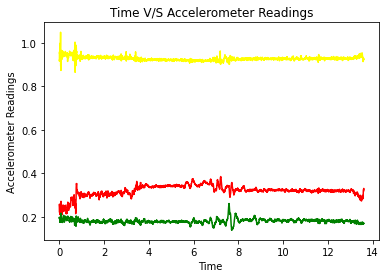

In [29]:
# for sitting
dt = pd.read_csv('Avnish_sitting1.csv')

x = dt['time'].tolist()  # time
z1 = dt['gFx'].tolist() # acceleration along x-axis
z2 = dt['gFy'].tolist() # acceleration along y-axis
z3 = dt['gFz'].tolist() # acceleration along z-axis

plt.plot(x[:], z1[:], color = "red")
plt.plot(x[:], z2[:], color = "green")
plt.plot(x[:], z3[:], color = "yellow")
plt.xlabel('Time ')
plt.ylabel('Accelerometer Readings')
plt.title('Time V/S Accelerometer Readings')
plt.show()

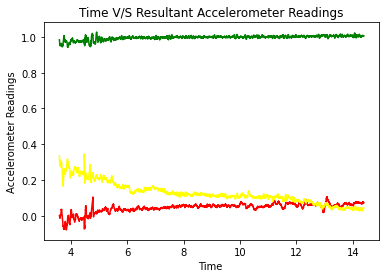

In [30]:
# for standing
dt = pd.read_csv('Avnish_standing1.csv')

x = dt['time'].tolist()  # time
x = x[1500:6000]   # selecting dt after removing noise

z1 = dt['gFx'].tolist()   # acceleration along x-axis
z2 = dt['gFy'].tolist()   # acceleartion along y-axis
z3 = dt['gFz'].tolist()   # acceleration along z-axis

plt.plot(x, z1[1500:6000], color="red")
plt.plot(x, z2[1500:6000], color= "green")
plt.plot(x, z3[1500:6000], color = "yellow")
plt.xlabel('Time ')
plt.ylabel('Accelerometer Readings')
plt.title('Time V/S Resultant Accelerometer Readings')
plt.show()

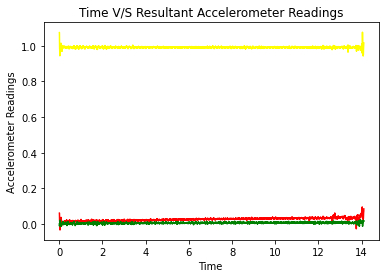

In [31]:
# for Laying down straight
dt = pd.read_csv('Avnish_sleeping1.csv')

x = dt['time'].tolist()  # time
z1 = dt['gFx'].tolist()  # acceleration along x-axis
z2 = dt['gFy'].tolist()  # acceleration along y-axis
z3 = dt['gFz'].tolist()  # acceleartion along z-axis

plt.plot(x, z1, color="red")
plt.plot(x, z2, color="green")
plt.plot(x, z3, color= "yellow")
plt.xlabel('Time ')
plt.ylabel('Accelerometer Readings')
plt.title('Time V/S Resultant Accelerometer Readings')
plt.show()

# 2(b)- Human posture detection using the real time data streamed to our system using phonepi app.

# For Laying down straight -


In [32]:
Sleep_X = []
Sleep_Y =[]
Sleep_Z=[]

with open("Avnish_Sleeping.txt", 'r') as file:   #loading data from phonepi app.
    plott = csv.reader(file, delimiter=',')

    for ROWS in plott:
        Sleep_X.append(float(ROWS[0]))
        Sleep_Y.append(float(ROWS[1]))
        Sleep_Z.append(float(ROWS[2]))
        
min_sleep_x = min(Sleep_X)
max_sleep_x = max(Sleep_X)
min_sleep_y = min(Sleep_Y) 
max_sleep_y = max(Sleep_Y)   # min and max values along x,y and z direction.
min_sleep_z = min(Sleep_Z) 
max_sleep_z = max(Sleep_Z) 

# For Standing -

In [33]:
Stand_X = []
Stand_Y =[]
Stand_Z=[]

with open("Avnish_Standing.txt", 'r') as file:   #loading data from phonepi app.
    plott = csv.reader(file, delimiter=',')

    for ROWS in plott:
        Stand_X.append(float(ROWS[0]))
        Stand_Y.append(float(ROWS[1]))
        Stand_Z.append(float(ROWS[2]))
min_stand_x = min(Stand_X)
max_stand_x = max(Stand_X)
min_stand_y = min(Stand_Y)   # min and max values along x,y and z direction.
max_stand_y = max(Stand_Y) 
min_stand_z = min(Stand_Z) 
max_stand_z = max(Stand_Z) 

# For Sitting -

In [34]:
Sit_X = []
Sit_Y =[]
Sit_Z=[]

with open("Avnish_Sitting.txt", 'r') as file:    #loading data from phonepi app.
    plott = csv.reader(file, delimiter=',')

    for ROWS in plott:
        Sit_X.append(float(ROWS[0]))
        Sit_Y.append(float(ROWS[1]))
        Sit_Z.append(float(ROWS[2]))

min_sit_x = min(Sit_X)
max_sit_x = max(Sit_X) 
min_sit_y = min(Sit_Y) 
max_sit_y = max(Sit_Y)    # min and max values along x,y and z direction.
min_sit_z = min(Sit_Z) 
max_sit_z = max(Sit_Z) 

# Collecting data in real time

Here, we are predicitng the position of user by using the above data

In [35]:
import csv

A_X = []   # Acceleration along x
A_Y = []   # Acceleration along y
A_Z = []   # Acceleration along z

with open("Avnish_Testing.txt", 'r') as file:
    plott = csv.reader(file, delimiter=',')

    for _ in plott:
        A_X.append(float(_[0]))
        A_Y.append(float(_[1]))
        A_Z.append(float(_[2]))

for i in range(len(A_X)):

    if ((A_X[i] >= min_stand_x and A_X[i] <= max_stand_x) and (A_Y[i] >= min_stand_y and A_Y[i] <= max_stand_y) and (A_Z[i] >= min_stand_z and A_Z[i] <= max_stand_z)):
        print("Acceleration along x-axis: ",A_X[i],"Acceleration along y-axis ",A_Y[i],"Acceleration along z-axis: ",A_Z[i],"Standing") # if acceleration values along x,y and z directions lies between the min and max acceleration values along
                                                                         # x,y and z direction respectively while standing then, predict standing.

    elif ((A_X[i] >= min_sit_x and A_X[i] <= max_sit_x) and (A_Y[i] >= min_sit_y and A_Y[i] <= max_sit_y) and (A_Z[i] >= min_sit_z and A_Z[i] <= max_sit_z)):
        print("Acceleration along x-axis",A_X[i],"Acceleration along y-axis",A_Y[i],"Acceleration along z-axis",A_Z[i],"Sitting") # if acceleration values along x,y and z directions lies between the min and max acceleration values along
                                                                        # x,y and z direction respectively while sitting then, predict sitting.

    elif ((A_X[i] >= min_sleep_x and A_X[i] <= max_sleep_x) and (A_Y[i] >= min_sleep_y and A_Y[i] <= max_sleep_y) and (A_Z[i] >= min_sleep_z and A_Z[i] <= max_sleep_z)):
        print("Acceleration along x-axis",A_X[i],"Acceleration along y-axis",A_Y[i],"Acceleration along z-axis ",A_Z[i],"Laying down straight") # if acceleration values along x,y and z directions lies between the min and max acceleration values along
                                                                         # x,y and z direction respectively while sleeping then, predict Laying down straight.
    else:
        print("Acceleartion along x-axis: ",A_X[i]," Acceleration along y-axis: ",A_Y[i]," Acceleration along z-axis: ",A_Z[i],"Pattern Not Recognized") # if values does not lie between the min amd max range of sitting, laying down straight and standing.

Acceleration along x-axis:  -0.541015625 Acceleration along y-axis  -9.770706176757812 Acceleration along z-axis:  0.1826629638671875 Standing
Acceleration along x-axis:  -0.7695159912109375 Acceleration along y-axis  -9.695343017578125 Acceleration along z-axis:  0.3980255126953125 Standing
Acceleration along x-axis:  -1.00042724609375 Acceleration along y-axis  -9.657058715820312 Acceleration along z-axis:  0.4877471923828125 Standing
Acceleration along x-axis:  -1.0554656982421875 Acceleration along y-axis  -9.66064453125 Acceleration along z-axis:  0.4398956298828125 Standing
Acceleration along x-axis:  -0.641510009765625 Acceleration along y-axis  -9.663040161132812 Acceleration along z-axis:  0.5152740478515625 Standing
Acceleration along x-axis:  -0.7611541748046875 Acceleration along y-axis  -9.6546630859375 Acceleration along z-axis:  0.652862548828125 Standing
Acceleration along x-axis:  -0.6522674560546875 Acceleration along y-axis  -9.587661743164062 Acceleration along z-ax